<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1 style="text-align: center;"><b> Sklearn and classification with KNN</b></h1>

## Description of the task

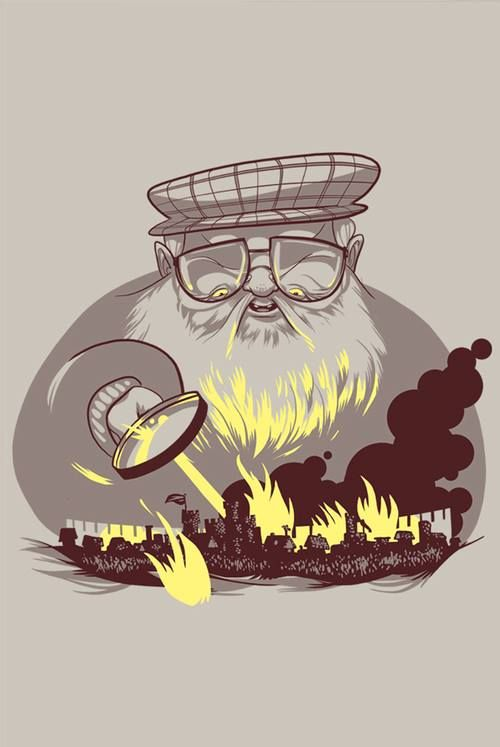

In this task we're working with a dataset on personalities from Game of Thrones World. [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). We need to predicts who is gonna survive and who isn't.



Data description:

* **name**: Name of the hero

* **Title**: Social status

* **House**: The House of the hero

* **Culture**: Social group

* **book1/2/3/4/5**: Appearance in the corresponding book

* **Is noble**: Noble/Title

* **Age**: Time Count: 305 AC

* **male**: Man/Woman

* **dateOfBirth**: Date of Birth

* **Spouse**: The name of the spouse

* **Father**: The name of the father

* **Mother**: The name of the mother

* **Heir**: The name of the heir

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Represents whether character's mother is alive

* **Is heir alive:** Represents whether character's heir is alive

* **Is father alive:** Represents whether character's father is alive

* **Number dead relations:** The number of deceased characters the character is related to

* **Popularity score:** Number of internal incoming and outgoing links to the character page in the wiki http://awoiaf.westeros.org

Target Variable:
* **isAlive**: Is the hero alive in the book series

## Part 1. Analysis and preprocessing

⭐ Loading a set

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 27.6MB/s]


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

⭐ Checking NaN values

In [ ]:
data_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [ ]:
data_test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


⭐ Checking the ratio of Nans

In [ ]:
percentage_null_train = (data_train.isnull().sum()/len(data_train))*100
percentage_null_test = (data_test.isnull().sum()/len(data_test))*100

In [ ]:
percentage_null_train

,0
name,0.000000
title,53.949904
male,0.000000
culture,68.657675
dateOfBirth,82.080925
mother,98.843931
father,98.587026
heir,98.651252
house,24.470135
spouse,87.154785


In [ ]:
data_train.loc[data_train['isAliveHeir'].isna(), 'dateOfBirth']

,dateOfBirth
S.No,
2,208.0
3,NaN
4,82.0
5,276.0
7,183.0
...,...
1553,NaN
1554,NaN
1555,NaN


⛅ Part of the requierements:

* Creating a feature isPopular. We have a popularity score feature in the table, set some threshold, 0.4, and let those characters whose popularity score is less than 0.4 be unpopular, i.e. isPopular = 0. If it is higher than 0.4, then let isPopular=1.
* Creating a feature boolDeadRelations. Let's simplify the feature numDeadRelations, and simply divide people into those who had at least some relations with dead characters, i.e. numDeadRelations > 0, and those who did not, i.e. numDeadRelations = 0.
* Simplify the feature culture by combining similar names into one.


In [ ]:
data_train['isPopular'] = data_train.apply(lambda row: 1 if row['popularity'] > 0.4 else 0, axis=1)
data_train.drop(columns=['popularity'], inplace=True)
data_test['isPopular'] = data_test.apply(lambda row: 1 if row['popularity'] > 0.4 else 0, axis=1)
data_test.drop(columns=['popularity'], inplace=True)

In [ ]:
data_train.isPopular.value_counts()

,count
isPopular,
0,1520
1,37


In [ ]:
data_test.isPopular.value_counts()

,count
isPopular,
0,334
1,55


In [ ]:
data_train.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


⭐ Checking correlation features-features, features-target

In [ ]:
correlation_train_table = data_train.corr(method='pearson', min_periods=1, numeric_only=True)

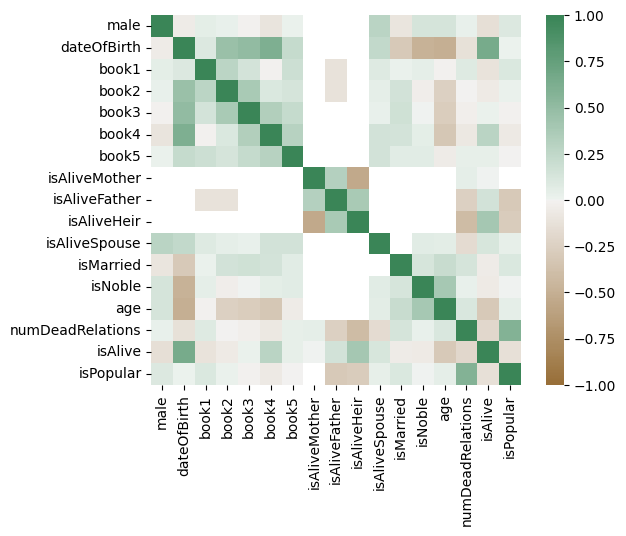

In [ ]:
axis_corr = sns.heatmap(
correlation_train_table,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

⭐ Decided to delete features, that contain more than 80% NaN values (we cannot change them to anything because that would distort data too much)

In [ ]:
data_train.drop(columns=['dateOfBirth', 'mother', 'father', 'heir', 'spouse',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data_test.drop(columns=['dateOfBirth', 'mother', 'father', 'heir', 'spouse',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

⭐ The dictionary containing the most frequently seen string values for 'culture' feature - some names are different however mean the same, we can use that later to match data

In [ ]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
data_train['boolDeadRelations'] = data_train.apply(lambda row:1 if row['numDeadRelations']>0 else 0, axis=1)
data_test['boolDeadRelations'] = data_test.apply(lambda row:1 if row['numDeadRelations']>0 else 0, axis=1)

In [ ]:
data_train.drop(columns=['numDeadRelations'], inplace=True)
data_test.drop(columns=['numDeadRelations'], inplace=True)

⭐ Applying 'culture' names matching

In [ ]:
def culture_replace(culture_value):
  if isinstance(culture_value, str):
    for key, values in cult.items():
      if culture_value.lower() in values:
        return key
    return culture_value

In [ ]:
data_train['culture'] = data_train['culture'].apply(culture_replace)
data_test['culture'] = data_test['culture'].apply(culture_replace)

In [ ]:
data_train.head()
data_test.head()

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,None,House Blackwood,0,0,0,0,1,0,0,100.0,0,0
1559,Melisandre,NaN,0,Asshai,R'hllor,0,1,1,1,1,0,0,NaN,1,0
1560,Merrit,NaN,0,None,Brotherhood without banners,0,0,1,1,0,0,0,NaN,0,0
1561,Meryn Trant,Ser,1,None,House Trant,1,1,1,1,1,0,1,NaN,0,0
1562,Merrett Frey,NaN,1,Riverlands,House Frey,1,1,1,1,1,1,0,38.0,1,0


In [ ]:
data_train.isAlive.value_counts()

,count
isAlive,
1,1212
0,345


⭐ We see we're dealing with the task of binary classification, target var has 2 possible values - 0/1. Since it's classification it's important to balance out the target var.
Checking the distribution of the target value => we see it's not balanced

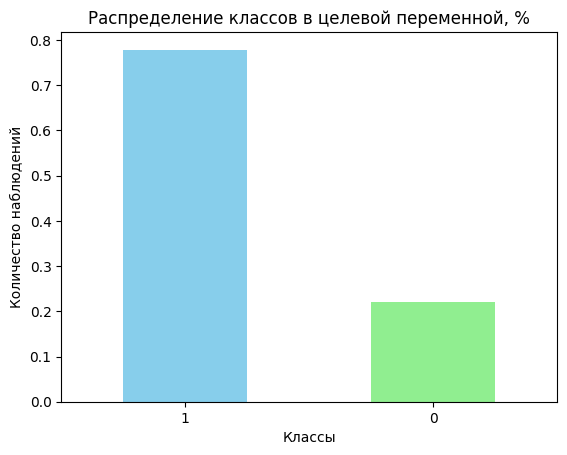

In [ ]:
class_counts = data_train.isAlive.value_counts()/len(data_train)
class_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Classes distributuin in the target value, %')
plt.xlabel('Classes')
plt.ylabel('Amount of samples')
plt.xticks(rotation=0)
plt.show()

In [ ]:
data_train.isAlive.dtypes

dtype('int64')

⭐ Checking the categorial features

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              717 non-null    object 
 2   male               1557 non-null   int64  
 3   culture            488 non-null    object 
 4   house              1176 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isMarried          1557 non-null   int64  
 11  isNoble            1557 non-null   int64  
 12  age                279 non-null    float64
 13  isAlive            1557 non-null   int64  
 14  isPopular          1557 non-null   int64  
 15  boolDeadRelations  1557 non-null   int64  
dtypes: float64(1), int64(11), obj

In [ ]:
house_count_train = data_train['house'].value_counts()
house_count_test = data_test['house'].value_counts()

In [ ]:
house_count_train
house_count_test

,count
house,
House Targaryen,22
House Martell,18
Night's Watch,17
House Stark,16
House Lannister,13
...,...
House Cuy,1
House Crabb,1
House Flint,1


In [ ]:
data_test.house.isna().sum()

46

⭐ We have many 'house' values presented - but the feature is categorial.
As I see the names of the Houses correspond to the family names presented in 'name' feature - I can take out this info from the 'name' feature => match the similar ones.

In [ ]:
data_train.loc[data_train['house'].isna(), 'house'] = 'House ' + data_train['name'].str.split().str[-1]

In [ ]:
data_test.loc[data_test['house'].isna(), 'house'] = 'House ' + data_test['name'].str.split().str[-1]

⭐ Dictionary with similar names for future mathcing

In [ ]:
house_mapping = {
    'House Baratheon of Dragonstone': 'House Baratheon',
    "House Baratheon of King's Landing": 'House Baratheon',
    'House Royce of the Gates of the Moon': 'House Royce',
    'Brotherhood Without Banners': 'Brotherhood without banners',
    'brotherhood without banners': 'Brotherhood without banners',
    'Brotherhood without Banners': 'Brotherhood without banners',
    'House Vance of Atranta': 'House Vance',
    'House Fossoway of Cider Hall': 'House Fossoway',
    'House Fossoway of New Barrel': 'House Fossoway',
    "Baratheon of King's Landing": 'House Baratheon',
    "House Vance of Wayfarer's Rest": 'House Vance',
    'House Farwynd of the Lonely Light': 'House Farwynd',
    'House Frey of Riverrun': 'House Frey',
    'House Kenning of Harlaw': 'House Kenning',
    "House Flint of Widow's Watch": 'House Flint',
    "House Harlaw of the Tower of Glimmering": 'House Harlaw',
    'House Harlaw of Harridan Hill': 'House Harlaw',
    'House Brune of the Dyre Den': 'House Brune',
    'House Brune of Brownhollow': 'House Brune',
    'House Tyrell of Brightwater Keep': 'House Tyrell',
    'House Dayne of High Hermitage': 'House Dayne',
    "House Bolton of the Dreadfort": 'House Bolton',
    'House Lannister of Casterly Rock House': 'House Lannister',
    'House Lannister of Lannisport': 'House Lannister',
    'House Lannister of Casterly Rock': 'House Lannister',
    'House Lannister of Seagard': 'House Lannister',
    'House Harlaw of Grey Garden': 'House Harlaw',
    'House Harlaw of Harlaw Hall': 'House Harlaw',
    'House (Winterfell)': 'House Stark'
}

In [ ]:
data_train['house'] = data_train['house'].replace(house_mapping)

In [ ]:
data_test['house'] = data_test['house'].replace(house_mapping)

In [ ]:
data_train.house.value_counts()

,count
house,
House Frey,94
Night's Watch,88
House Stark,61
House Targaryen,54
House Lannister,39
...,...
House Dhazzar,1
House Denestan,1
House Del,1


In [ ]:
data_train.isna().sum()

,0
name,0
title,840
male,0
culture,1069
house,0
book1,0
book2,0
book3,0
book4,0
book5,0


In [ ]:
pd.set_option('display.max_rows', None)
house_count_train = data_train['house'].value_counts()
house_count_test = data_test['house'].value_counts()

In [ ]:
house_count_test

,count
house,
House Targaryen,25
House Martell,19
Night's Watch,17
House Stark,16
House Lannister,14
House Baratheon,12
House Greyjoy,12
Brotherhood without banners,11
Brave Companions,9


⭐ Signing the unpopular houses as 'Not significant'
Of course I understand that typically i cannot see test_data and manipulate it the same way as train_data, here I'd better use the ration of popular-unpopular houses and then apply the mapping based on this ratio but for simplicity we're just using numbers here

In [ ]:
data_train['house'] = data_train['house'].\
        map(lambda x: 'Not significant' if (house_count_train.get(x, 0) <= 7 or pd.isna(x)) else x)
data_test['house'] = data_test['house'].\
        map(lambda x: 'Not significant' if (house_count_test.get(x, 0) <= 2 or pd.isna(x)) else x)

In [ ]:
data_train.house.value_counts()

,count
house,
Not significant,931
House Frey,94
Night's Watch,88
House Stark,61
House Targaryen,54
House Lannister,39
House Tyrell,35
House Greyjoy,31
House Osgrey,20


In [ ]:
data_train.title.value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9
Septa,9


⭐ Replacing NaN to type object 'no_title'

In [ ]:
data_train['title'] =  data_train['title'].fillna('no_title')
data_test['title'] =  data_test['title'].fillna('no_title')

In [ ]:
data_train['title'] =  data_train['title'].apply(lambda x: x.split()[0])
data_test['title'] =  data_test['title'].apply(lambda x: x.split()[0])

In [ ]:
data_train.title.value_counts()

,count
title,
no_title,840
Ser,306
Lord,63
Maester,29
Archmaester,21
Septon,16
Winterfell,15
Prince,14
King,14


In [ ]:
data_test.title.value_counts()

,count
title,
no_title,168
Ser,78
Lord,17
Maester,10
Princess,7
Lady,5
Prince,5
Master,3
First,3


⭐ Splitting title on categories

In [ ]:
title_counts_train = data_train['title'].value_counts()

# Преобразуем title в зависимости от частот
data_train['title'] = data_train['title'].map(lambda x: 'High_title' if (title_counts_train.get(x, 0) >= 9 and title_counts_train.get(x, 0) < 350) else x)
data_train['title'] = data_train['title'].map(lambda x: 'Average_title' if (title_counts_train.get(x, 0) >= 4 and title_counts_train.get(x, 0) <= 8) else x)
data_train['title'] = data_train['title'].map(lambda x: 'Small_title' if (title_counts_train.get(x, 0) >= 1 and title_counts_train.get(x, 0) <= 3) else x)


In [ ]:
data_train.title.value_counts()
data_test.title.value_counts()

,count
title,
no_title,168
Ser,78
Lord,17
Maester,10
Princess,7
Lady,5
Prince,5
Master,3
First,3


In [ ]:
title_counts_test = data_test['title'].value_counts()

data_test['title'] = data_test['title'].map(lambda x: 'High_title' if (title_counts_test.get(x, 0) >= 5 and title_counts_test.get(x, 0) < 80) else x)
data_test['title'] = data_test['title'].map(lambda x: 'Average_title' if (title_counts_test.get(x, 0) >= 2 and title_counts_test.get(x, 0) <= 4) else x)
data_test['title'] = data_test['title'].map(lambda x: 'Small_title' if (title_counts_test.get(x, 0) == 1) else x)


In [ ]:
data_test['title'].isna().sum()

0

⭐ Dropping old features we took information from

In [ ]:
#data_train.drop(columns=['title', 'name'], inplace=True)
#data_test.drop(columns=['title', 'name'], inplace=True)
data_train.drop(columns=['name'], inplace=True)
data_test.drop(columns=['name'], inplace=True)

In [ ]:
percentage_null = (data_train.isnull().sum()/len(data_train))*100
percentage_null

,0
title,0.000000
male,0.000000
culture,68.657675
house,0.000000
book1,0.000000
book2,0.000000
book3,0.000000
book4,0.000000
book5,0.000000
isMarried,0.000000


⭐ 'culture' is still full of NaNs - I drop it.
Also I drop the 'name', we took the 'house' from it now we dont need it - not correlated to target var.

In [ ]:
data_train.drop(columns=['culture'], inplace=True)
data_test.drop(columns=['culture'], inplace=True)

In [ ]:
data_train.describe()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,0.138728,0.327553,0.431599,0.562620,0.330122,0.128452,0.439306,35.290323,0.778420,0.023764,0.044316
std,0.491829,0.345774,0.469472,0.495458,0.496223,0.470408,0.334700,0.496462,26.364864,0.415443,0.152361,0.205862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,49.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [ ]:
data_test.house.value_counts()

,count
house,
Not significant,160
House Targaryen,25
House Martell,19
Night's Watch,17
House Stark,16
House Lannister,14
House Baratheon,12
House Greyjoy,12
Brotherhood without banners,11


In [ ]:
data_train.house.value_counts()

,count
house,
Not significant,931
House Frey,94
Night's Watch,88
House Stark,61
House Targaryen,54
House Lannister,39
House Tyrell,35
House Greyjoy,31
House Osgrey,20


⭐ Splitting houses

In [ ]:
data_train['house'] = data_train['house'].map(lambda x: 'Very significant' if (house_count_train.get(x, 0) >= 17 and
                                                                   house_count_train.get(x, 0) < 200) else x)
data_train['house'] = data_train['house'].map(lambda x: 'Medium significant' if (house_count_train.get(x, 0) >= 11 and
                                                                   house_count_train.get(x, 0) <= 15) else x)
data_train['house'] = data_train['house'].map(lambda x: 'Little significant' if (house_count_train.get(x, 0) >= 8 and
                                                                   house_count_train.get(x, 0) < 11) else x)

In [ ]:
data_test['house'] = data_test['house'].map(lambda x: 'Very significant' if (house_count_test.get(x, 0) >= 12 and
                                                                   house_count_test.get(x, 0) < 26) else x)
data_test['house'] = data_test['house'].map(lambda x: 'Medium significant' if (house_count_test.get(x, 0) >= 5 and
                                                                   house_count_test.get(x, 0) <= 11) else x)
data_test['house'] = data_test['house'].map(lambda x: 'Little significant' if (house_count_test.get(x, 0) >= 2 and
                                                                   house_count_test.get(x, 0) <= 4) else x)

In [ ]:
#data_train['house'].value_counts()
data_test['house'].value_counts()

,count
house,
Not significant,160
Very significant,115
Medium significant,63
Little significant,51


In [ ]:
data_test.isna().sum()

,0
title,0
male,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0


⭐ ONE HOT ENCODING!!!!!!!!!!!

In [ ]:
one_hot_encoded_train_house = pd.get_dummies(data_train['house'])
one_hot_encoded_test_house = pd.get_dummies(data_test['house'])

In [ ]:
data_encoded_train_house = pd.concat([data_train, one_hot_encoded_train_house], axis=1)
data_encoded_test_house = pd.concat([data_test, one_hot_encoded_test_house], axis=1)

In [ ]:
data_encoded_train_house.drop(columns=['house'], inplace=True)
data_encoded_test_house.drop(columns=['house'], inplace=True)

In [ ]:
data_encoded_test_house.dtypes

,0
title,object
male,int64
book1,int64
book2,int64
book3,int64
book4,int64
book5,int64
isMarried,int64
isNoble,int64
age,float64


In [ ]:
data_encoded_train_house['Little significant'] = data_encoded_train_house['Little significant'].astype(int)
data_encoded_train_house['Medium significant'] = data_encoded_train_house['Medium significant'].astype(int)
data_encoded_train_house['Very significant'] = data_encoded_train_house['Very significant'].astype(int)
data_encoded_train_house['Not significant'] = data_encoded_train_house['Not significant'].astype(int)
data_encoded_test_house['Little significant'] = data_encoded_test_house['Little significant'].astype(int)
data_encoded_test_house['Medium significant'] = data_encoded_test_house['Medium significant'].astype(int)
data_encoded_test_house['Very significant'] = data_encoded_test_house['Very significant'].astype(int)
data_encoded_test_house['Not significant'] = data_encoded_test_house['Not significant'].astype(int)

In [ ]:
data_encoded_train_house.isna().sum()
data_encoded_test_house.isna().sum()

,0
title,0
male,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,235


In [ ]:
one_hot_encoded_train_title = pd.get_dummies(data_encoded_train_house['title'])
one_hot_encoded_test_title = pd.get_dummies(data_encoded_test_house['title'])

In [ ]:
data_encoded_train = pd.concat([data_encoded_train_house, one_hot_encoded_train_title], axis=1)
data_encoded_test = pd.concat([data_encoded_test_house, one_hot_encoded_test_title], axis=1)

In [ ]:
data_encoded_test.columns

Index(['title', 'male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age', 'isPopular', 'boolDeadRelations',
       'Little significant', 'Medium significant', 'Not significant',
       'Very significant', 'Average_title', 'High_title', 'Small_title',
       'no_title'],
      dtype='object')

In [ ]:
data_encoded_train.isna().sum()
data_encoded_test.isna().sum()

,0
title,0
male,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,235


In [ ]:
data_encoded_train.drop(columns=['title'], inplace=True)
data_encoded_test.drop(columns=['title'], inplace=True)

⭐ Replacing NaN values of 'age' to the median value. We have a lot of Nans but we cannot drop this feature it correlates too much with target

In [ ]:
data_encoded_train['age'] = data_encoded_train['age'].fillna(data_encoded_train['age'].median())
data_encoded_test['age'] = data_encoded_test['age'].fillna(data_encoded_test['age'].median())

In [ ]:
data_encoded_train.isna().sum()

,0
male,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,0
isAlive,0


In [ ]:
correlation_matrix_train = data_encoded_train.corr()
print(correlation_matrix_train['isAlive'])

male                 -0.148290
book1                -0.112468
book2                -0.055998
book3                 0.018427
book4                 0.284014
book5                 0.032531
isMarried            -0.049381
isNoble              -0.060572
age                  -0.179331
isAlive               1.000000
isPopular            -0.140131
boolDeadRelations    -0.178177
Little significant   -0.041569
Medium significant    0.047766
Not significant       0.117617
Very significant     -0.129664
Average_title        -0.007385
High_title           -0.027086
Small_title          -0.045160
no_title              0.056242
Name: isAlive, dtype: float64


<ipython-input-76-188930aa84a5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='correlation', y='features', data=correlation_df_train, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

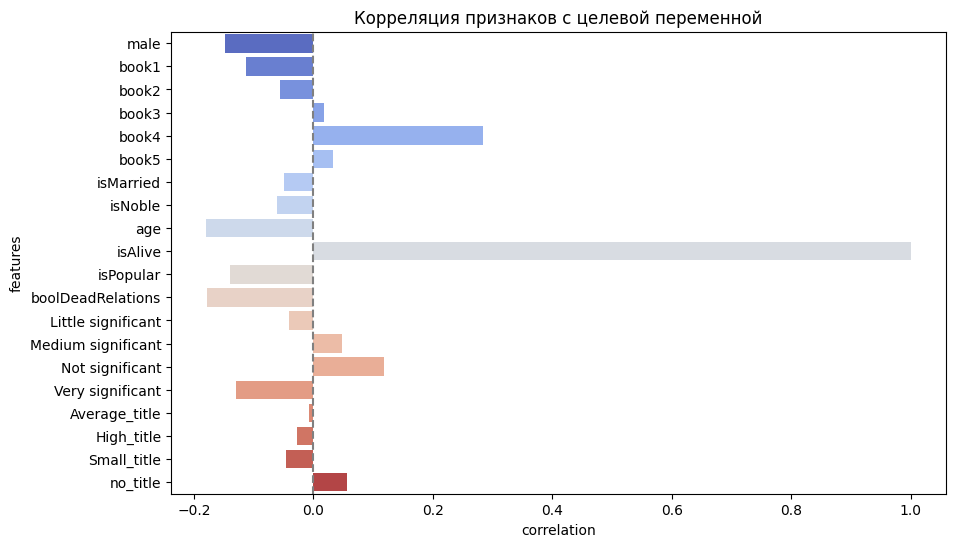

In [ ]:
correlation_data_train = {
    'features': ['male', 'book1', 'book2', 'book3', 'book4',
                 'book5', 'isMarried', 'isNoble', 'age', 'isAlive',
                 'isPopular', 'boolDeadRelations', 'Little significant',
                 'Medium significant', 'Not significant', 'Very significant',
                 'Average_title', 'High_title', 'Small_title', 'no_title'],
    'correlation': correlation_matrix_train['isAlive']
}

correlation_df_train = pd.DataFrame(correlation_data_train)


plt.figure(figsize=(10, 6))
sns.barplot(x='correlation', y='features', data=correlation_df_train, palette='coolwarm')
plt.title('Корреляция признаков с целевой переменной')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

⭐ Looking for features that correlate with target < 0.05 -> features_to_drop

In [ ]:
target_correlation = correlation_matrix_train['isAlive']
features_to_drop = target_correlation[abs(target_correlation) < 0.05].index.tolist()

In [ ]:
#data_encoded_train.isna().sum()
data_encoded_test.isna().sum()

,0
male,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,0
isPopular,0


In [ ]:
features_to_drop

['book3',
 'book5',
 'isMarried',
 'Little significant',
 'Medium significant',
 'Average_title',
 'High_title',
 'Small_title']

In [ ]:
data_encoded_train.drop(columns= ['book3', 'book5', 'isMarried', 'Little significant', 'Medium significant',
                                  'Average_title', 'High_title', 'Small_title'], inplace=True)
data_encoded_test.drop(columns= ['book3', 'book5', 'isMarried', 'Little significant', 'Medium significant',
                                  'Average_title', 'High_title', 'Small_title'], inplace=True)

In [ ]:
data_encoded_train.head()

,male,book1,book2,book4,isNoble,age,isAlive,isPopular,boolDeadRelations,Not significant,Very significant,no_title
S.No,,,,,,,,,,,,
1,1,0,0,0,0,24.0,0,1,1,0,1,True
2,1,1,1,1,1,97.0,1,1,1,0,1,False
3,1,0,0,1,1,24.0,1,0,0,1,0,False
4,0,0,0,0,1,23.0,0,0,0,0,0,False
5,0,0,0,1,1,29.0,1,0,0,1,0,False


In [ ]:
data_encoded_train['no_title'] = data_encoded_train['no_title'].astype(int)
data_encoded_test['no_title'] = data_encoded_test['no_title'].astype(int)

In [ ]:
data_encoded_test.head()

,male,book1,book2,book4,isNoble,age,isPopular,boolDeadRelations,Not significant,Very significant,no_title
S.No,,,,,,,,,,,
1558,0,0,0,0,0,100.0,0,0,1,0,1
1559,0,0,1,1,0,32.0,1,0,1,0,1
1560,0,0,0,1,0,32.0,0,0,0,0,1
1561,1,1,1,1,1,32.0,0,0,1,0,0
1562,1,1,1,1,0,38.0,1,0,0,0,1


⭐ Data split to X (features) and y (target)

In [ ]:
X_train = data_encoded_train.drop(columns=['isAlive'])
y_train = data_encoded_train['isAlive']

In [ ]:
X_test = data_encoded_test

In [ ]:
X_test.head()

,male,book1,book2,book4,isNoble,age,isPopular,boolDeadRelations,Not significant,Very significant,no_title
S.No,,,,,,,,,,,
1558,0,0,0,0,0,100.0,0,0,1,0,1
1559,0,0,1,1,0,32.0,1,0,1,0,1
1560,0,0,0,1,0,32.0,0,0,0,0,1
1561,1,1,1,1,1,32.0,0,0,1,0,0
1562,1,1,1,1,0,38.0,1,0,0,0,1


## Part 2. Training the model

**Requirement.** Models from `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


⭐ First, `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logistic_regression = LogisticRegression(C=1)

logistic_regression.fit(X_train_scaled, y_train)

y_pred = logistic_regression.predict(X_test_scaled)

⭐ Other models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

def train_and_evaluate_model(model, model_name):
    # Cross-val
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Mean cross-accuracy
    print(f"Model: {model_name}")
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")
    print("="*60)

    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_test = model.predict(X_test_scaled)

    print(f"Test predictions for {model_name}:")
    print(y_pred_test)
    print("="*60)

In [ ]:
!pip install catboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 5.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(C=1),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier(random_state=44),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=35),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

In [ ]:
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)

Model: Logistic Regression
Mean cross-validation accuracy: 0.79
Test predictions for Logistic Regression:
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Model: AdaBoost Classifier
Mean cross-validation accuracy: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test predictions for AdaBoost Classifier:
[0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1
 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1]
Model: Random Forest Classifier
Mean cross-validation accuracy: 0.79
Test predictions for Random Forest Classifier:
[0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1

## Part 3. Quality estimation

In [ ]:
from sklearn.metrics import accuracy_score

⭐ Here I'm trying to find the best params via RandomisedSearchCV for the forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [int(x) for x in range(100, 1200, 100)],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [int(x) for x in range(10, 110, 10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

print(f'Лучшие параметры: {rf_random.best_params_}')

best_rf = rf_random.best_estimator_
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)

print(f'Точность на кросс-валидации: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 70, 'criterion': 'entropy', 'bootstrap': False}
Точность на кросс-валидации: 0.8015 ± 0.0130


✊ Катбуст!

### Файл `submission.csv`

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.13MB/s]


In [ ]:
best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

⭐ XGBoost to try

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict, KFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import sklearn

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=42)

In [ ]:
cvx = KFold(n_splits=10, shuffle=True, random_state=239)

In [ ]:
early_stop = xgb.callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,
    data_name="validation_0",
    metric_name="logloss"
)

In [ ]:
sklearn.set_config(enable_metadata_routing=True)

In [ ]:
model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=239,
    callbacks=[early_stop],
    tree_method="approx"
).set_fit_request(eval_set=True)

In [ ]:
cv_preds = cross_val_predict(
    estimator=model,
    X=X_train_split,
    y=y_train_split,
    cv=cvx,
    method='predict',
    params={"eval_set": [(X_valid_split, y_valid_split)]},
    verbose=1
)

[0]	validation_0-logloss:0.55609
[1]	validation_0-logloss:0.55049
[2]	validation_0-logloss:0.54406
[3]	validation_0-logloss:0.53959
[4]	validation_0-logloss:0.53467
[5]	validation_0-logloss:0.53139
[6]	validation_0-logloss:0.52816
[7]	validation_0-logloss:0.52467
[8]	validation_0-logloss:0.52154
[9]	validation_0-logloss:0.51858
[10]	validation_0-logloss:0.51660
[11]	validation_0-logloss:0.51442
[12]	validation_0-logloss:0.51238
[13]	validation_0-logloss:0.51098
[14]	validation_0-logloss:0.50941
[15]	validation_0-logloss:0.50841
[16]	validation_0-logloss:0.50766
[17]	validation_0-logloss:0.50653
[18]	validation_0-logloss:0.50521
[19]	validation_0-logloss:0.50444
[20]	validation_0-logloss:0.50353
[21]	validation_0-logloss:0.50260
[22]	validation_0-logloss:0.50165
[23]	validation_0-logloss:0.50166
[24]	validation_0-logloss:0.50114
[25]	validation_0-logloss:0.50096
[26]	validation_0-logloss:0.50014
[27]	validation_0-logloss:0.49991
[28]	validation_0-logloss:0.49950
[29]	validation_0-loglos

In [ ]:
accuracy = accuracy_score(y_train_split, cv_preds)
print(f"Accuracy from cross-validation: {accuracy:.2f}")

Accuracy from cross-validation: 0.81


In [ ]:
model.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_valid_split, y_valid_split)],
    verbose=True
)

[0]	validation_0-logloss:0.55433
[1]	validation_0-logloss:0.54703
[2]	validation_0-logloss:0.54007
[3]	validation_0-logloss:0.53283
[4]	validation_0-logloss:0.52650
[5]	validation_0-logloss:0.52112
[6]	validation_0-logloss:0.51566
[7]	validation_0-logloss:0.51114
[8]	validation_0-logloss:0.50637
[9]	validation_0-logloss:0.50228
[10]	validation_0-logloss:0.49873
[11]	validation_0-logloss:0.49544
[12]	validation_0-logloss:0.49186
[13]	validation_0-logloss:0.48904
[14]	validation_0-logloss:0.48655
[15]	validation_0-logloss:0.48422
[16]	validation_0-logloss:0.48247
[17]	validation_0-logloss:0.48050
[18]	validation_0-logloss:0.47865
[19]	validation_0-logloss:0.47668
[20]	validation_0-logloss:0.47521
[21]	validation_0-logloss:0.47397
[22]	validation_0-logloss:0.47266
[23]	validation_0-logloss:0.47170
[24]	validation_0-logloss:0.47055
[25]	validation_0-logloss:0.46957
[26]	validation_0-logloss:0.46830
[27]	validation_0-logloss:0.46740
[28]	validation_0-logloss:0.46652
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x790ec6f12b90>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=239, ...)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_test_pred = model.predict(X_test_scaled)
print("Test predictions:")
print(y_test_pred)

Test predictions:
[0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   isAlive  389 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [ ]:
#submission['isAlive'] = y_pred
submission['isAlive'] = y_test_pred
submission['isAlive']


,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
1563,0
1564,1
1565,1
1566,1


In [ ]:
submission.to_csv("/content/submission_2013.csv", index=True)

In [ ]:
new_submission = pd.read_csv("/content/submission_2013.csv")

In [ ]:
new_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   S.No     389 non-null    int64
 1   isAlive  389 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


In [ ]:
new_submission.head()

,S.No,isAlive
0,1558,0
1,1559,1
2,1560,1
3,1561,1
4,1562,1
